In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

In [14]:
datos = carga_csv('ex1data1.csv')

In [15]:
X = datos[:, :-1]
np.shape(X)         # (97, 1)

Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

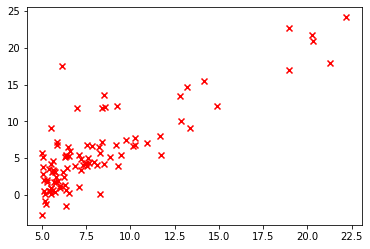

In [16]:
plt.scatter(X[:,-1], Y, c='r', marker='x')

In [17]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

def descenso_gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta, coste(X, Y, NuevaTheta)

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [19]:
def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

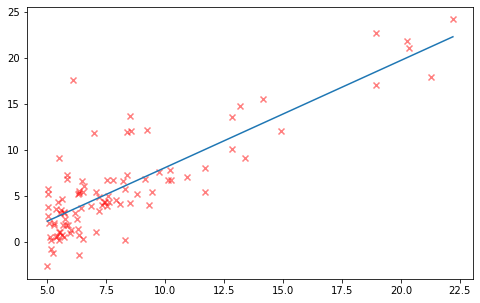

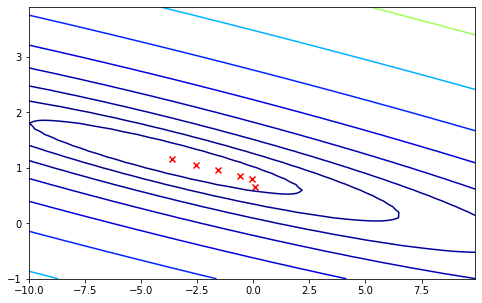

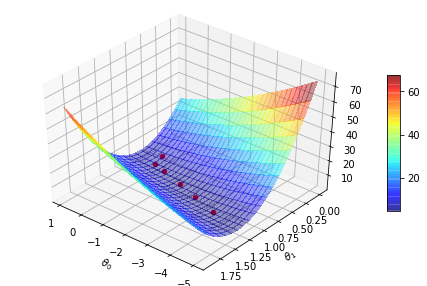

In [20]:
# Inicializamos Theta0 y Theta1 a 0.0
Theta = np.array([0.0,0.0])
# Tomamos una alpha con un valor bajo para no dar grandes saltos al buscar el minimo
alpha = 0.01

# Vamos a mostrar solo ciertos estados de las graficas
mostrar = [1,20,100,300,600,1500]

## Generamos las matrices para dibujar la grafica
# Datos para dibujar la gráfica de contornos
data_contour = make_data([-10, 10], [-1, 4], X, Y)
# Datos para dibujar la gráfica 3D
data_3D = make_data([-5, 1], [0, 2], X, Y)

plt.figure(1, figsize=(8,5))
plt.scatter(X[:,-1],Y, c='r', marker='x',alpha=0.5,label="Input data")

plt.figure(2, figsize=(8,5))
plt.contour(data_contour[0], data_contour[1], data_contour[2], np.logspace(-2, 3, 20), cmap=cm.jet)

fig = plt.figure(3, figsize=(8,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(data_3D[0], data_3D[1], data_3D[2], cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.4)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.view_init(40, 130)

# Realizamos el método de descenso del gradiente
for i in range(1500):
    # Calculamos la nueva Theta que minimize el error cometido
    Theta, cost = descenso_gradiente(X, Y, Theta, alpha)
    
    # Generamos la recta de nuestra regresión lineal con los valores de Theta actuales
    x = np.linspace(min(X[:,-1]), max(X[:,-1]))
    y = Theta[0] + Theta[1]*x
    
    # Dibujamos las gráficas adecuadas (regresión lineal, coste2D y coste 3D)
    if i+1 in mostrar:
        #### Dibujar coste con contornos 2D ####
        plt.figure(2)
        plt.scatter(Theta[0], Theta[1], marker='x', c='r', label='Cost')
        
        #### Dibujar coste en 3D ####
        plt.figure(3)
        ax.scatter(Theta[0], Theta[1], cost, c='r', label='Cost')
        
    
plt.figure(1)
plt.plot(x,y)

plt.figure(3)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()